In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from scipy.stats import norm,binom
from scipy.stats import poisson
cor = sns.color_palette("pink", 5)


In [ ]:
#Leitura do DataFrame
pop_br = 'populacao_brasileira.csv'

# Leitura do arquivo CSV
df_pop_br = pd.read_csv(pop_br)

df_pop_br = df_pop_br.drop('Unnamed: 0', axis=1)

#Imprimir na tela o DataFrame
display(df_pop_br.head())


,estado,idade,escolaridade,nível de proficiência em inglês,renda,sexo
0,MA,56,Fundamental,Intermediário,4006.29,F
1,BA,46,Superior,Básico,2423.11,M
2,AM,32,Fundamental,Intermediário,3835.69,M
3,CE,60,Superior,Básico,1870.29,M
4,SE,25,Fundamental,Avançado,3529.80,M


In [ ]:
#Informações DataFrame

total_linhas = df_pop_br.shape[0]

total_colunas = df_pop_br.shape[1]

tipos_de_variaveis =df_pop_br.dtypes

estat_descrit = df_pop_br.describe()


print(f"Total de linhas do DataFrame:{total_linhas} \n")

print(f"Total de Colunas do DataFrame:{total_colunas} \n")

print(f"Tipos das variáveis do DataFrame:\n{tipos_de_variaveis} \n")

print(f"Estatística Descritiva do DataFrame: \n{estat_descrit}")


Total de linhas do DataFrame:1000 

Total de Colunas do DataFrame:6 

Tipos das variáveis do DataFrame:
estado                              object
idade                                int64
escolaridade                        object
nível de proficiência em inglês     object
renda                              float64
sexo                                object
dtype: object 

Estatística Descritiva do DataFrame: 
             idade        renda
count  1000.000000  1000.000000
mean     40.986000  3082.537180
std      13.497852   996.572239
min      18.000000   103.740000
25%      29.000000  2425.815000
50%      42.000000  3076.415000
75%      52.000000  3714.487500
max      64.000000  5632.380000


In [ ]:
# Exercício 1

# P= n(E)/ n(S)

df_total= df_pop_br['nível de proficiência em inglês'].value_counts().sum()

df_nao_fluente = df_pop_br[df_pop_br['nível de proficiência em inglês'] != 'Avançado']

contagem_nao_fluente = df_nao_fluente['nível de proficiência em inglês'].value_counts().sum()

prob_nao_fluente=  round(contagem_nao_fluente/df_total,2)

print(f'A probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês é de: {prob_nao_fluente}')


A probabilidade de escolhermos uma pessoa aleatória e ela não ser fluente em inglês é de: 0.66


In [ ]:
#Exercício 2


df_local_AL_PA = df_pop_br[(df_pop_br['estado'] == 'PA') | (df_pop_br['estado'] == 'AL')]

df_local= df_local_AL_PA.value_counts().sum()

df_acima_cinco = df_local_AL_PA [df_local_AL_PA ['renda'] > 5000.00].value_counts().sum()


prob_AL_PR=  round(df_acima_cinco/df_local,2)

print(f'A probabilidade de escolhermos uma pessoa aleatória e ela ser do PR ou AL e ter renda superior a 5 mil reais: {prob_AL_PR}')



A probabilidade de escolhermos uma pessoa aleatória e ela ser do PR ou AL e ter renda superior a 5 mil reais: 0.05


In [ ]:
#Exercício 3

df_local_AM = df_pop_br[(df_pop_br['estado'] == 'AM')]

df_local= df_local_AM.value_counts().sum()

df_ens_sup_AM = df_local_AM[(df_local_AM['escolaridade'] == 'Superior')].value_counts().sum()

prob_Sup_AM=  round(df_ens_sup_AM/df_local,2)

print(f'A probabilidade de escolhermos uma pessoa aleatória e ela ser do AM e ter curso superior: {prob_Sup_AM}')

A probabilidade de escolhermos uma pessoa aleatória e ela ser do AM e ter curso superior: 0.24


In [ ]:
#Exercício 4

faixa_renda = pd.cut(df_pop_br['renda'], bins=range(0, 6500, 1500), right=False)
cont_faixa = faixa_renda.value_counts().sort_index()
total_faixa= len(df_pop_br['renda'])

print('A renda de uma pessoa brasileira está na sua maioria na faixa de 3000-4000 mil \n')


# Densidade de probabilidade em cada faixa
densidade_probab = round(cont_faixa / total_faixa,2)
print(f"A densidade de probabilidade de cada faixa de renda:\n{densidade_probab}")



A renda de uma pessoa brasileira está na sua maioria na faixa de 3000-4000 mil 

A densidade de probabilidade de cada faixa de renda:
[0, 1500)       0.06
[1500, 3000)    0.41
[3000, 4500)    0.44
[4500, 6000)    0.09
Name: renda, dtype: float64


A média da renda é: 3082.54
A Variância da renda é:993156.23


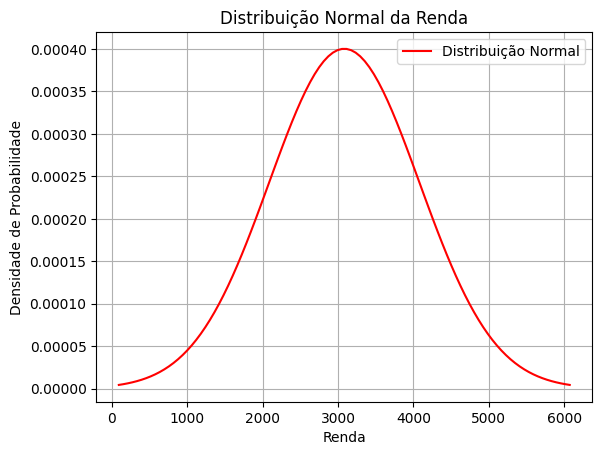

In [ ]:
#Exercício 5

media_renda = df_pop_br['renda'].mean()
variancia_renda = df_pop_br['renda'].var()

print(f'A média da renda é: {round(media_renda,2)}')

print(f'A Variância da renda é:{round(variancia_renda,2)}')

# Criando a distribuição normal com base na média e variância da renda
mu, sigma = media_renda, np.sqrt(variancia_renda)
dist_normal = norm(mu, sigma)

# Gerando valores para o gráfico
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = dist_normal.pdf(x)

# Plotando a distribuição normal
plt.plot(x, y, label='Distribuição Normal', color='red')
plt.title('Distribuição Normal da Renda')
plt.xlabel('Renda')
plt.ylabel('Densidade de Probabilidade')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
#Exercício 6

#Probabilidade de pessoas com escolaridade de pós-graduação

total= len(df_pop_br['escolaridade'])

df_ens_Pos = df_pop_br[(df_pop_br['escolaridade'] == 'Pós-graduação')].value_counts().sum()

prob_Pos=  round(df_ens_Pos/total,2)

print(f'A Probabilidade de pessoas com escolaridade de pós-graduação é de: {prob_Pos}')

#População brasileira com 1 milhão de habitantes, qual a probabilidade de encontrarmos 243 mil pessoas com pós-graduação

n = 1000000
k = 243000
p = prob_Pos

prob_243 = binom.pmf(k, n, p)
print(f"A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra  com 1 milhão de habitantes é de: {prob_243}")



A Probabilidade de pessoas com escolaridade de pós-graduação é de: 0.25
A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra  com 1 milhão de habitantes é de: 7.274241342681515e-61


A probabilidade de encontrarmos 243 mil pessoas com pós-graduação em uma amostra  com 1 milhão de habitantes é muito pequena para ser representada com precisão finita. Nesse caso, podemos concluir que a probabilidade é extremamente baixa.


In [ ]:
#Exercício 7

cont_esc = df_pop_br['escolaridade'].value_counts()

prob_esc = cont_esc / len(df_pop_br)

densidade_acumulada = prob_esc.cumsum()

print(" A Função de Densidade Acumulada Discreta para cada nível de escolaridade é de:")
print(densidade_acumulada)

 A Função de Densidade Acumulada Discreta para cada nível de escolaridade é de:
Fundamental      0.266
Pós-graduação    0.519
Superior         0.762
Médio            1.000
Name: escolaridade, dtype: float64


In [ ]:
#Exercício 8

p = 0.5
n= df_pop_br[df_pop_br['nível de proficiência em inglês'] == 'Intermediário'].value_counts().sum()
z = 1.96  #para um intervalo de confiança de 95%

# Calcular a margem de erro amostral
margem_erro = z * np.sqrt((p * (1 - p)) / n)

print(f"Margem de erro amostral da proporção populacional: {(round(margem_erro,2))}")




Margem de erro amostral da proporção populacional: 0.05


In [ ]:
#Exercício 9
media_renda = np.mean(df_pop_br['renda'])
desvio_padrao_renda = np.std(df_pop_br['renda'])

renda_sup = media_renda + 1000

#Probabilidade de uma pessoa com renda superior a mil reais acima da média

prob_sup = 1 - norm.cdf(renda_sup, loc=media_renda, scale=desvio_padrao_renda)

n = len(df_pop_br)
k = 60
probabilidade_60 = binom.pmf(k, n, prob_sup)

print(f"A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é de: {probabilidade_60}")



A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é de: 1.267725497531328e-21


A probabilidade de encontrar 60 pessoas com uma renda mil reais superior à média é muito pequena para ser representada com precisão finita. Nesse caso, podemos concluir que a probabilidade é extremamente baixa.


In [ ]:
#Exercício 10

df_sudeste= df_pop_br[(df_pop_br['estado'] == 'MG') | (df_pop_br['estado'] == 'SP') | (df_pop_br['estado'] == 'RJ')| (df_pop_br['estado'] == 'ES')]

df_sudeste_homem= df_sudeste[df_sudeste['sexo']== 'M']

count_sudeste_homem= df_sudeste_homem.value_counts().sum()

df_homem_fund_maior_2= df_sudeste_homem[(df_sudeste_homem['escolaridade']=='Fundamental')|(df_sudeste_homem['renda'] > 2000.00)].value_counts().sum()


prob_homem_fund_maior_2 = df_homem_fund_maior_2 / count_sudeste_homem


print(f" A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de: {(round(prob_homem_fund_maior_2,2))}")





 A probabilidade de escolhermos alguém do Sudeste que seja homem, com ensino fundamental e com renda maior que 2 mil reais por mês é de: 0.93
